Distance normalized to 1AU (astronomical unit) and time to 1Y (year)

In [1]:
import matplotlib.pyplot as plt

In [18]:
# initial conditions

t = 0 
x = [35.2, 0]  # position vector
v = [0, 0.1920952]  # velocity vector
dt= 0.01
Nt= 50000 # 500 years
Gamma = 39.39

In [19]:
def r(x):
    return (x[0]**2+x[1]**2)**(1/2)
def a(x, r):
    return -Gamma*x/r**3
def step_x(x, v, r):
    return x + v * dt + a(x, r)/2 * dt

def total_energy(x, y, vx, vy):
    return (vx**2+vy**2)**(1/2)/2+Gamma/(x**2+y**2)**(1/2)

In [20]:
xs = [] # position history
vs = []  # velocity history

vhalf = v.copy()

for i in range(Nt):
    ri   = r(x.copy()) 
    a_old = [a(x[0],ri), a(x[1],ri)]
    x[0] = x[0]+ v[0]*dt + a_old[0]/2*dt**2
    x[1] = x[1]+ v[1]*dt + a_old[1]/2*dt**2
    xs.append(x.copy())
    ri   = r(x.copy())

    a_new = [a(x[0],ri), a(x[1],ri)]
    
    v[0] = v[0] + (a_old[0]+a_new[0])*dt/2
    v[1] = v[1] + (a_old[1]+a_new[1])*dt/2
    vs.append(v.copy())

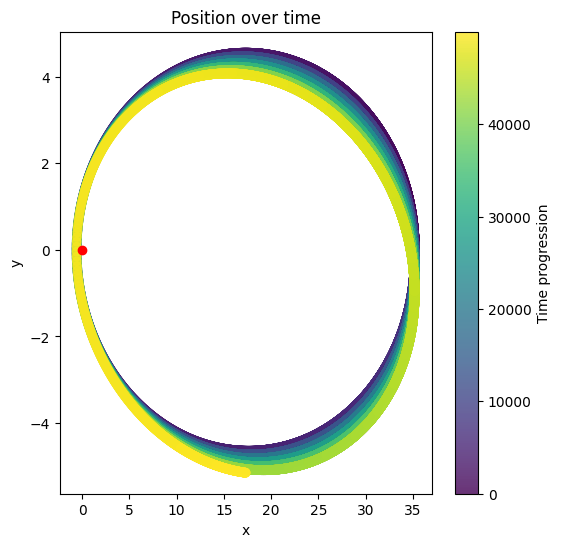

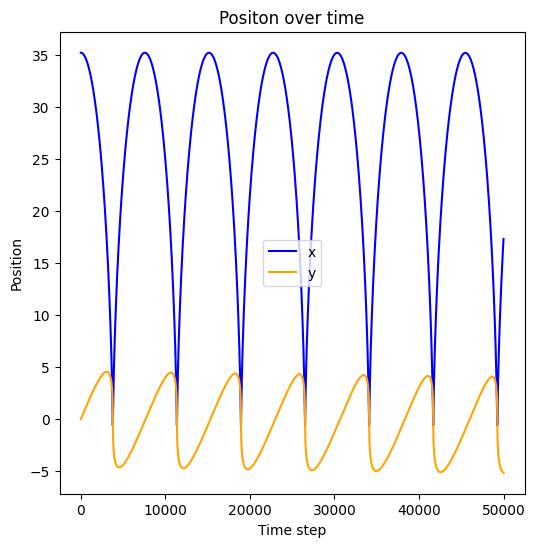

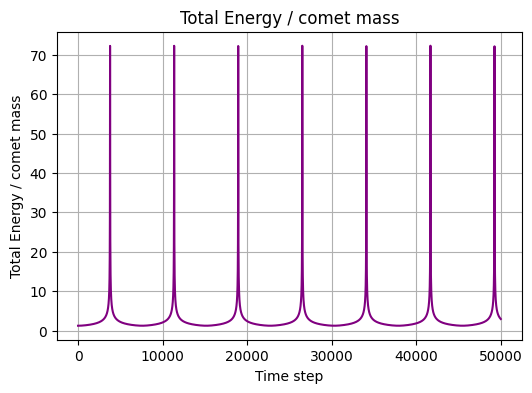

In [21]:
colors = range(Nt)  # values between 0 and 1 for colormap
xx, yy = zip(*xs)
vx, vy = zip(*vs)
Es = [total_energy(x, y, vx_i, vy_i) for (x, y), (vx_i, vy_i) in zip(xs, vs)]
# Plot
plt.figure(figsize=(6,6))
scatter = plt.scatter(xx, yy, c=colors, cmap='viridis', alpha=0.8)
plt.scatter(0,0, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Position over time')
plt.colorbar(scatter, label='Time progression')
plt.show()

# Velocity over time (plot each component)
plt.figure(figsize=(6,6))
plt.plot(xx, label='x', color='blue')
plt.plot(yy, label='y', color='orange')
plt.xlabel('Time step')
plt.ylabel('Position')
plt.title('Positon over time')
plt.legend()
plt.show()


plt.figure(figsize=(6,4))
plt.plot(range(Nt), Es, color='purple')
plt.xlabel('Time step')
plt.ylabel('Total Energy / comet mass')
plt.title('Total Energy / comet mass')
plt.grid(True)
plt.show()